# Kernels for hand-made SVM

**In this homework we will again look at SVM kernels and will write and test rbf kernel for our own implementation.**

In [1]:
'''
If you are using Google Colab, uncomment the next line to download `svm.py`
You can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.
'''
# !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/assignment0_03_SVM/svm.py 

'\nIf you are using Google Colab, uncomment the next line to download `svm.py`\nYou can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.\n'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for our SVM class"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.predict(xy).reshape(X.shape)
    # plot decision boundary and margins
    CS = ax.contourf(X, Y, P, origin='lower', cmap='autumn', alpha=0.1)
    plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [4]:
from sklearn.datasets import make_circles

from sklearn.svm import SVC # "Support vector classifier"

X, y = make_circles(150, factor=.1, noise=.1, random_state=42)

X_test, y_test = X[100:], y[100:]
X, y = X[:100], y[:100]

### Sklearn realization:

Test accuracy:  0.64


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


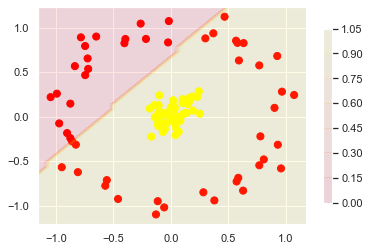

In [5]:
clf = SVC(kernel='linear').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Test accuracy:  1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


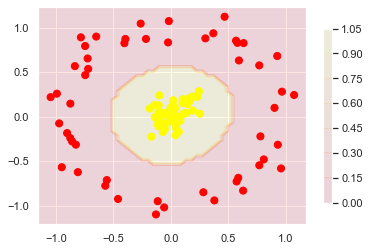

In [6]:
clf = SVC(kernel='rbf').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Let's look at our realization

### You need to open svm.py file and add all missed lines.

Linear SVM __primal__ optimization problem can be formulated as

$$ \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w X_i - b)) + \lambda ||w||_2 \to \min_w $$

This problem can be solved with gradient or sub-gradien methods.

-----
Whereas __dual__ optimization problem formulates as follows:

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i (X_i \cdot X_j ) y_j c_j \to \max_{c_1,...,c_n} \\ \text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

Where $W = \sum_{i=1}^n c_i y_i X_i$.

In this quadratic optimization problem we can use kernel trick: <br/>
introduce fucntion $K(X_i, X_j) = \phi (X_i) \phi (X_j)$ and change dot products in our optimization problem

Then we have 

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i K(X_i, X_j) y_j c_j \to \max_{c_1,...,c_n} \\
\text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

$W = \sum_{i=1}^n c_i y_i \phi(X_i)$

In quadratic programming we can straightforwardly add kernel function, but it is not that simple, if we want to use gradient algorithms.

----
However primal optimization problem with kernels can be formulated like (see [Olivier Chapelle, 2006](https://www.cs.utah.edu/~piyush/teaching/svm-solving-primal.pdf)):

$$f(x) = \sum_{i=1}^n \beta_i K(x_i, x)$$

$$K: K_{i,j} = K(x_i, x_j)$$

$$ \lambda \vec{\beta^T} K \vec{\beta} + \sum_{i=1}^n L(y_i, K_i^T \vec{\beta}) \to \min_{\vec{\beta}}$$

where L is Hinge loss: $L(y_i, K_i^T \vec{\beta}) = \max(0, 1 - y_i (K_i^T \vec{\beta}))$

#### Radial basis function kernel.

####  The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as:

## $K(x,x') = \exp \big{[}- \frac{||x-x'||^2}{2 \sigma^2} \big{]}.$

### Let's look how it works:

In [7]:
# uncomment this cell if you are working in colab
# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s20/homeworks_basic/assignment0_03_SVM/svm.py -nc

In [17]:
%load_ext autoreload
%autoreload 2

In [22]:
from svm import SVM, rbf

In [23]:
y[y==0] = -1 # for convenience with formulas
y_test[y_test==0] = -1

Epoch 0, Loss: 0.3199480712413788
Epoch 1, Loss: 0.29426912069320676
Epoch 2, Loss: 0.33003289699554444
Test accuracy:  0.38


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


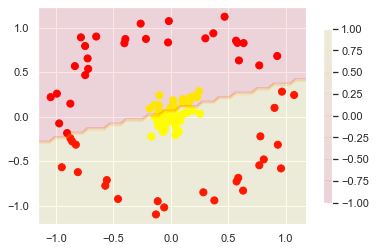

In [25]:
clf = SVM(epochs=3, lr=1, batch_size=20, verbose=True)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [66]:
rbf(X, X)

tensor([[1.0000, 0.2431, 0.5652,  ..., 0.3197, 0.5822, 0.5883],
        [0.2431, 1.0000, 0.5083,  ..., 0.8879, 0.5861, 0.5137],
        [0.5652, 0.5083, 1.0000,  ..., 0.4074, 0.9899, 0.9992],
        ...,
        [0.3197, 0.8879, 0.4074,  ..., 1.0000, 0.4880, 0.4201],
        [0.5822, 0.5861, 0.9899,  ..., 0.4880, 1.0000, 0.9925],
        [0.5883, 0.5137, 0.9992,  ..., 0.4201, 0.9925, 1.0000]])

In [68]:
dists = np.sum(X*X, axis=1).reshape(-1, 1) + np.sum(X*X, axis=1) - 2 * X.dot(X.T)

In [69]:
sigma = 1.

In [70]:
K = np.exp(- dists /(2 * sigma))

In [71]:
K

array([[1.        , 0.24311735, 0.5652259 , ..., 0.31973703, 0.58215709,
        0.58825441],
       [0.24311735, 1.        , 0.50826334, ..., 0.88786936, 0.58614009,
        0.51372583],
       [0.5652259 , 0.50826334, 1.        , ..., 0.40739196, 0.98991125,
        0.99915652],
       ...,
       [0.31973703, 0.88786936, 0.40739196, ..., 1.        , 0.48803218,
        0.42008729],
       [0.58215709, 0.58614009, 0.98991125, ..., 0.48803218, 1.        ,
        0.99254808],
       [0.58825441, 0.51372583, 0.99915652, ..., 0.42008729, 0.99254808,
        1.        ]])

In [72]:
from sklearn.metrics.pairwise import rbf_kernel

In [105]:
rbf_kernel(X, X)

array([[1.        , 0.24311735, 0.5652259 , ..., 0.31973703, 0.58215709,
        0.58825441],
       [0.24311735, 1.        , 0.50826334, ..., 0.88786936, 0.58614009,
        0.51372583],
       [0.5652259 , 0.50826334, 1.        , ..., 0.40739196, 0.98991125,
        0.99915652],
       ...,
       [0.31973703, 0.88786936, 0.40739196, ..., 1.        , 0.48803218,
        0.42008729],
       [0.58215709, 0.58614009, 0.98991125, ..., 0.48803218, 1.        ,
        0.99254808],
       [0.58825441, 0.51372583, 0.99915652, ..., 0.42008729, 0.99254808,
        1.        ]])

In [78]:
def ker(x_1, x_2, sigma):
    dists = np.dot(x_1, x_1.T) + np.dot(x_2, x_2.T) - 2 * np.dot(x_1, x_2.T)
    return np.exp(- dists /(2 * sigma))

In [79]:
ker(X, X, sigma)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [82]:
X_test.shape

(50, 2)

In [83]:
X.shape

(100, 2)

In [88]:
len(X)

100

In [104]:
rbf(X_test, X_test)

tensor([[1.0000, 0.3882, 0.1112,  ..., 0.7694, 0.4771, 0.5801],
        [0.3882, 1.0000, 0.3804,  ..., 0.8076, 0.6119, 0.6405],
        [0.1112, 0.3804, 1.0000,  ..., 0.2549, 0.6762, 0.5738],
        ...,
        [0.7694, 0.8076, 0.2549,  ..., 1.0000, 0.6662, 0.7525],
        [0.4771, 0.6119, 0.6762,  ..., 0.6662, 1.0000, 0.9849],
        [0.5801, 0.6405, 0.5738,  ..., 0.7525, 0.9849, 1.0000]])

In [93]:
res = np.sum(X_test*X_test, axis=1).reshape(-1, 1) + np.sum(X*X, axis=1) - 2 * X_test.dot(X.T)

In [94]:
res.shape

(50, 100)

In [99]:
def ker2(x_1, x_2, sigma):
    X1X1 = np.einsum('ij,ij->i', x_1, x_1)
    X2X2 = np.einsum('ij,ij->i', x_2, x_2)
    X1X2T = np.einsum('ij, kj->ik', x_1, x_2)
    
    dists = (X1X1.reshape(-1, 1) + X2X2) - 2 * X1X2T
    return np.exp(- dists /(2 * sigma))

In [100]:
ker2(X, X, sigma)

array([[1.        , 0.24311735, 0.5652259 , ..., 0.31973703, 0.58215709,
        0.58825441],
       [0.24311735, 1.        , 0.50826334, ..., 0.88786936, 0.58614009,
        0.51372583],
       [0.5652259 , 0.50826334, 1.        , ..., 0.40739196, 0.98991125,
        0.99915652],
       ...,
       [0.31973703, 0.88786936, 0.40739196, ..., 1.        , 0.48803218,
        0.42008729],
       [0.58215709, 0.58614009, 0.98991125, ..., 0.48803218, 1.        ,
        0.99254808],
       [0.58825441, 0.51372583, 0.99915652, ..., 0.42008729, 0.99254808,
        1.        ]])

In [102]:
ker2(X_test, X, sigma)

array([[0.84208834, 0.4149501 , 0.48910609, ..., 0.58938278, 0.54548649,
        0.51307985],
       [0.22221779, 0.99861302, 0.48304977, ..., 0.87678848, 0.55922109,
        0.48784233],
       [0.12193415, 0.3854578 , 0.61632639, ..., 0.19730007, 0.59204063,
        0.59355293],
       ...,
       [0.51874649, 0.83240071, 0.59230633, ..., 0.93007305, 0.67724293,
        0.60975929],
       [0.4881737 , 0.63630459, 0.97347413, ..., 0.49934221, 0.98681694,
        0.97149141],
       [0.57049671, 0.66797029, 0.96121847, ..., 0.57036396, 0.99020639,
        0.96614659]])

In [ ]:
  X @ X_test.T 

In [87]:
X1X2 = np.einsum('ij,kj->ik', X_test, X)

In [ ]:
X1X2T = np.einsum('ij, kj->ik', x_1, x_2)

In [106]:
rbf(X_test, X)

tensor([[0.8421, 0.4150, 0.4891,  ..., 0.5894, 0.5455, 0.5131],
        [0.2222, 0.9986, 0.4830,  ..., 0.8768, 0.5592, 0.4878],
        [0.1219, 0.3855, 0.6163,  ..., 0.1973, 0.5920, 0.5936],
        ...,
        [0.5187, 0.8324, 0.5923,  ..., 0.9301, 0.6772, 0.6098],
        [0.4882, 0.6363, 0.9735,  ..., 0.4993, 0.9868, 0.9715],
        [0.5705, 0.6680, 0.9612,  ..., 0.5704, 0.9902, 0.9661]])

Epoch 0, Loss: 0.2935098737478256
Epoch 1, Loss: 0.265205106139183
Epoch 2, Loss: 0.2091908723115921
Epoch 3, Loss: 0.20400472581386567
Epoch 4, Loss: 0.2174054741859436
Epoch 5, Loss: 0.24643009006977082
Epoch 6, Loss: 0.20301688313484192
Epoch 7, Loss: 0.2547914534807205
Epoch 8, Loss: 0.191839736700058
Epoch 9, Loss: 0.1800095945596695
Epoch 10, Loss: 0.17708625495433808
Epoch 11, Loss: 0.179877932369709
Epoch 12, Loss: 0.18481057435274123
Epoch 13, Loss: 0.16536805480718614
Epoch 14, Loss: 0.15247537493705748
Epoch 15, Loss: 0.22037235796451568
Epoch 16, Loss: 0.11081430315971375
Epoch 17, Loss: 0.16859657913446427
Epoch 18, Loss: 0.17293583750724792
Epoch 19, Loss: 0.13404708802700044
Epoch 20, Loss: 0.05641396418213844
Epoch 21, Loss: 0.22810064032673835
Epoch 22, Loss: 0.1493896458297968
Epoch 23, Loss: 0.13691620863974094
Epoch 24, Loss: 0.1558304473757744
Epoch 25, Loss: 0.10193153172731399
Epoch 26, Loss: 0.12183473184704781
Epoch 27, Loss: 0.09165905341506005
Epoch 28, Loss:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


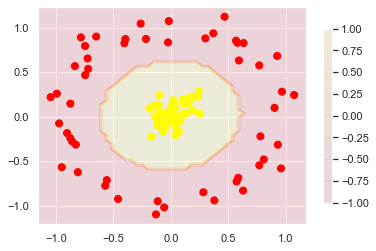

In [107]:
clf = SVM(epochs=100, lr=0.1, batch_size=20, verbose=True, kernel_function=rbf)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [108]:
assert accuracy_score(y_test, pred) > 0.95

## Our model with rbf kernel can learn this dataset too.